In [30]:
%load_ext autoreload
%autoreload 2

import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA

from epsilon_transformers.process.processes import PROCESS_REGISTRY
from epsilon_transformers.process.processes import RRXOR, EvenProcess, GoldenMean, Nond
from epsilon_transformers.visualization.graph import transition_matrix_to_graph, visualize_graph

# use seaborn to plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
print(f"The avaialble processes are: {PROCESS_REGISTRY.keys()}")


The avaialble processes are: dict_keys(['z1r', 'rrxor', 'mess3', 'even', 'golden_mean', 'nond'])


In [31]:
def plot_entropy_rates(mixed_state_tree):
    # compute the myopic entropy rate from the msp
    block_entropy = mixed_state_tree.block_entropy
    myopic_entropy = mixed_state_tree.myopic_entropy

    plt.style.use('seaborn-v0_8-talk')
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plotting Block Entropy
    axs[0].plot(np.arange(1, len(block_entropy) + 1), block_entropy, label='Block Entropy', color='black', marker='o', linestyle='-')
    axs[0].set_title('Block Entropy over Block Length')
    axs[0].set_xlabel('Block Length')
    axs[0].set_ylabel('Entropy [nats]')
    axs[0].legend()

    # Plotting Myopic Entropy
    axs[1].plot(np.arange(1, len(myopic_entropy) + 1), myopic_entropy, label='Myopic Entropy', color='black', marker='s', linestyle='-')
    axs[1].set_title('Myopic Entropy over Block Length')
    axs[1].set_xlabel('Block Length')
    axs[1].set_ylabel('Entropy [nats]')
    plt.tight_layout()
    plt.show()

# RRXOR process
This library has a Process class that we use to define a data generating HMM.

The most important part of the process is the transition matrix, which defines the transitions between states. You can get it via `process.transition_matrix`. It is a numpy array of shape (num_emission, num_states, num_states), and defines the transition probabilities from state i to state j given emission k.

The process also has a `state_names_dict`, which is a dictionary mapping state names to state indices. You can get it via `process.state_names_dict`.


In [43]:
process = RRXOR()


In [44]:
process.transition_matrix

array([[[0. , 0.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0.5],
        [1. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ]]])

In [45]:
process.state_names_dict

{'S': 0, '0': 1, '1': 2, 'T': 3, 'F': 4}

# Visualizing the process

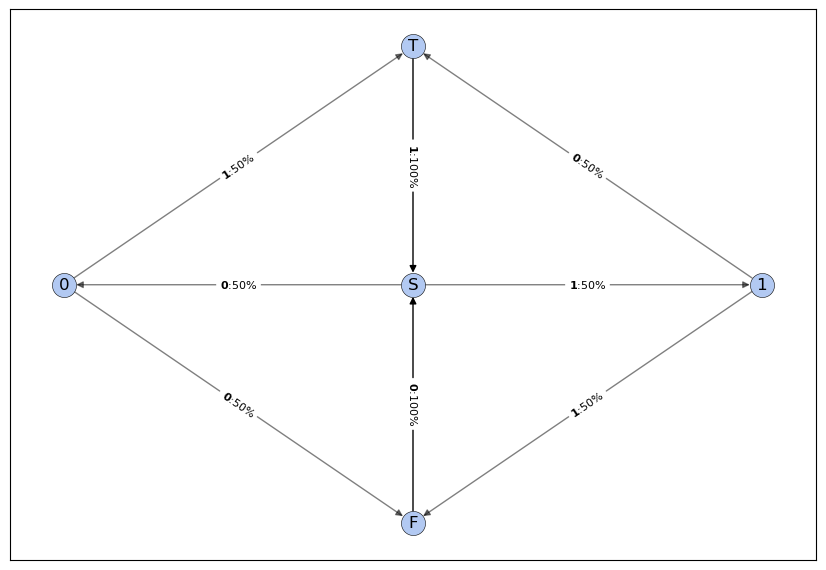

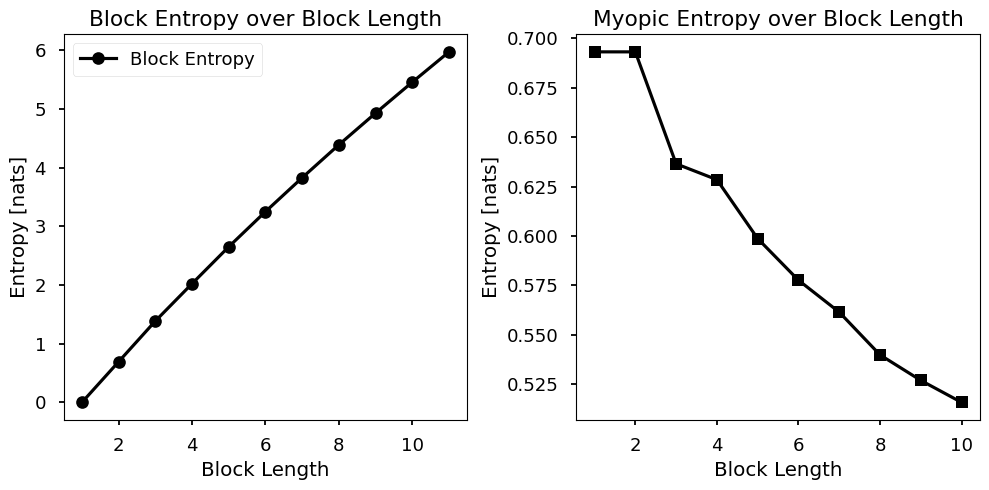

In [46]:
graph = transition_matrix_to_graph(transition_matrix=process.transition_matrix,state_names=process.state_names_dict)
visualize_graph(graph, draw_mixed_state=True, layout='spectral')
mixed_state_tree = process.derive_mixed_state_presentation(depth=11)
plot_entropy_rates(mixed_state_tree)


# The Even Process

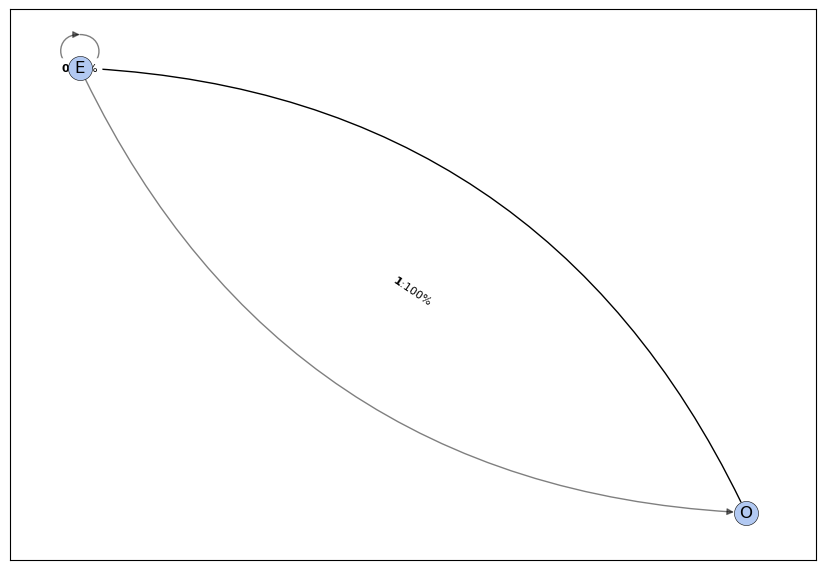

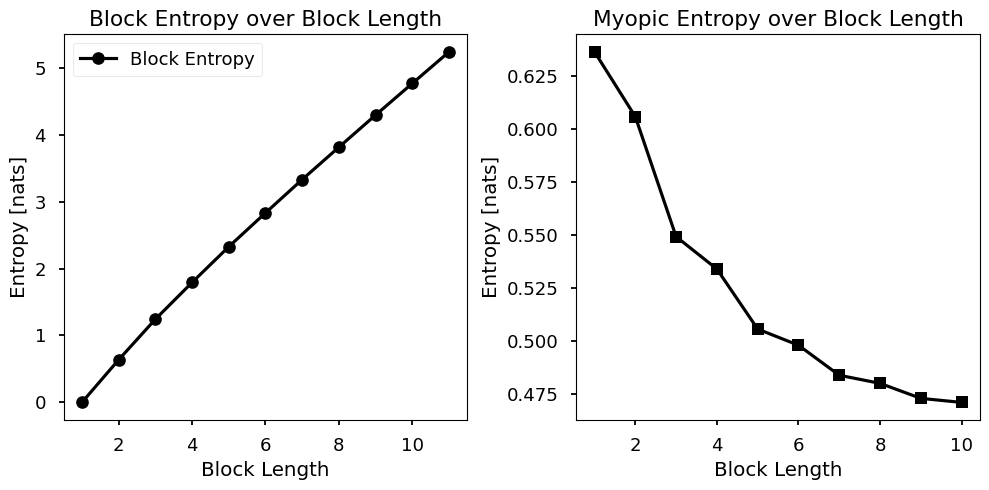

In [47]:
process = EvenProcess()
graph = transition_matrix_to_graph(transition_matrix=process.transition_matrix,state_names=process.state_names_dict)
visualize_graph(graph, draw_mixed_state=True)
mixed_state_tree = process.derive_mixed_state_presentation(depth=11)
plot_entropy_rates(mixed_state_tree)

# The Golden Mean Process

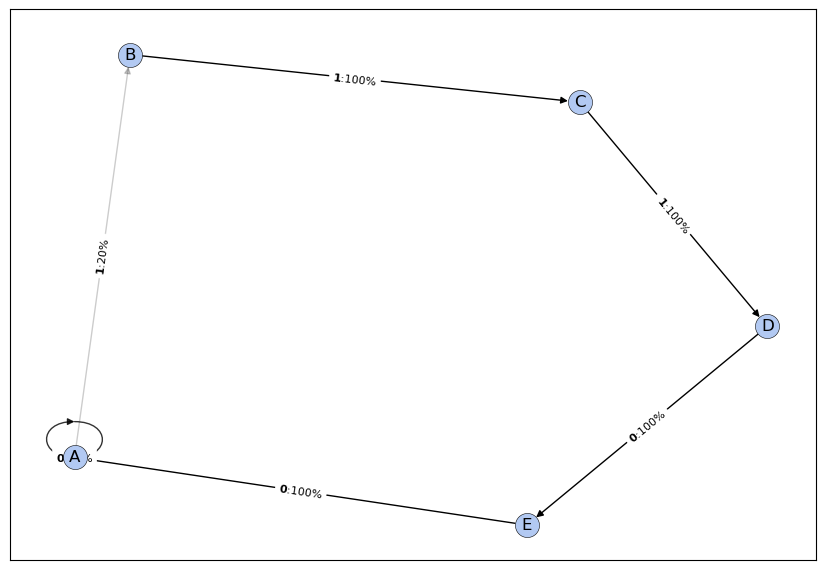

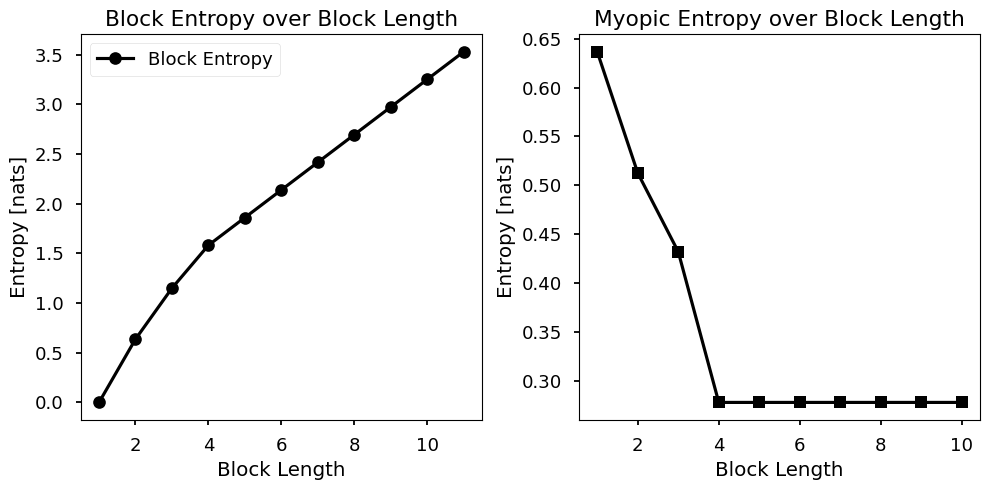

In [48]:
process = GoldenMean(R=3, k=2, p=0.2)
graph = transition_matrix_to_graph(transition_matrix=process.transition_matrix,state_names=process.state_names_dict)
visualize_graph(graph, draw_mixed_state=True)
mixed_state_tree = process.derive_mixed_state_presentation(depth=11)
plot_entropy_rates(mixed_state_tree)


# The Nond Process

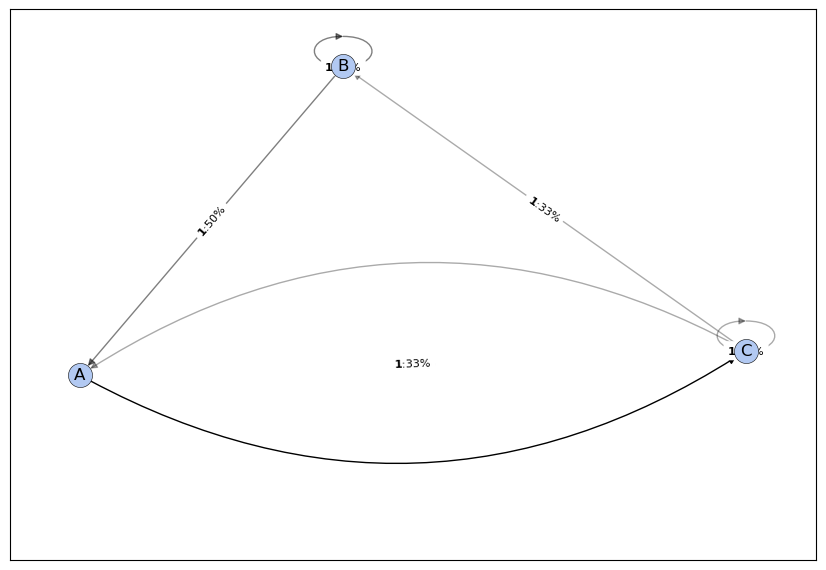

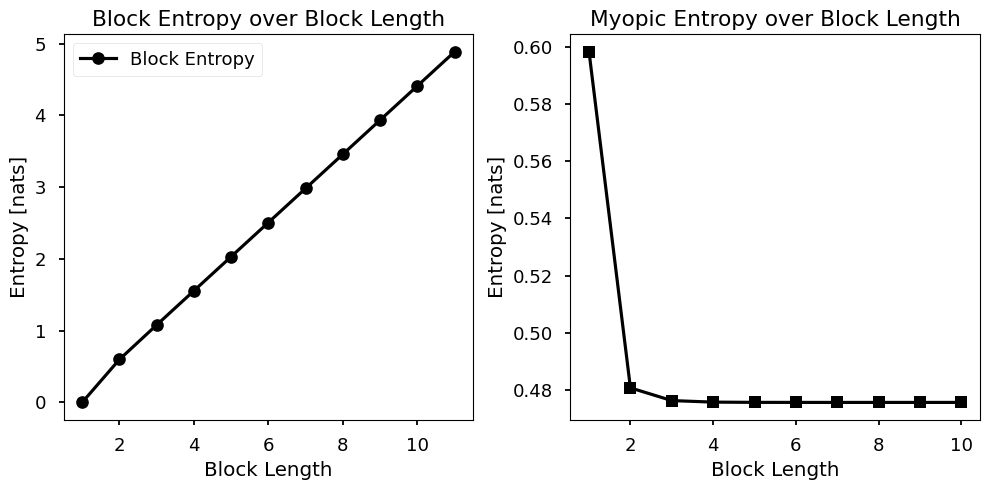

In [49]:
process = Nond()
graph = transition_matrix_to_graph(transition_matrix=process.transition_matrix,state_names=process.state_names_dict)
visualize_graph(graph, draw_mixed_state=True)
mixed_state_tree = process.derive_mixed_state_presentation(depth=11)
plot_entropy_rates(mixed_state_tree)